In [1]:
from utils.results import *
import torch
import matplotlib.pyplot as plt
import json

In [2]:
# settings for the plots,
dataset= 'mvtec_loco'
run= "contamination_0"  
experiment=  "Exp_17_02_24-"#,"Exp0-r18",
#category= "juice_bottle"

RESPATH="results"
DATASET=os.path.join(RESPATH, dataset)  


with open('/home/bule/projects/UTRAD/configurations/mvtec_loco.json', 'r') as file:
    conf_loco = json.load(file)
print(list(conf_loco['anomaly_categories'].keys()))

['breakfast_box', 'juice_bottle', 'pushpins', 'screw_bag', 'splicing_connectors']


In [3]:
exp_name= "Exp_04_06_24"
category= "breakfast_box"
root= '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_0/'

with open('/home/bule/projects/UTRAD/configurations/mvtec_loco.json', 'r') as file:
    conf_loco = json.load(file)
print(list(conf_loco['anomaly_categories'].keys()))

run=1
logfile_path= os.path.join(root, f'{exp_name}_run_{run}-{category}', 'args.log')

category_list= list(conf_loco['anomaly_categories'].keys())
#category_list= ['breakfast_box', 'screw_bag']
run_range= np.arange(1,6)

res_df=[]
for category in category_list:
    print(category)
    logfile_paths= []
    for run in run_range:
        logfile_path= os.path.join(root, f'{exp_name}_run_{run}-{category}', 'args.log')
        if os.path.exists(logfile_path):
            logfile_paths.append(logfile_path)
        
    lastrow_df=last_rows_metric(logfile_paths)
    lastrow_df['category']= [category]*len(lastrow_df)
    res_df.append(lastrow_df)
    
res_df= pd.concat(res_df)
res_df['contamination']= ['0']*len(res_df)
res_df['setting']= ['clean']*len(res_df)


res_df.head()

['breakfast_box', 'juice_bottle', 'pushpins', 'screw_bag', 'splicing_connectors']
breakfast_box
juice_bottle
pushpins
screw_bag
splicing_connectors


,category,contamination,setting


['breakfast_box', 'juice_bottle', 'pushpins', 'screw_bag', 'splicing_connectors']


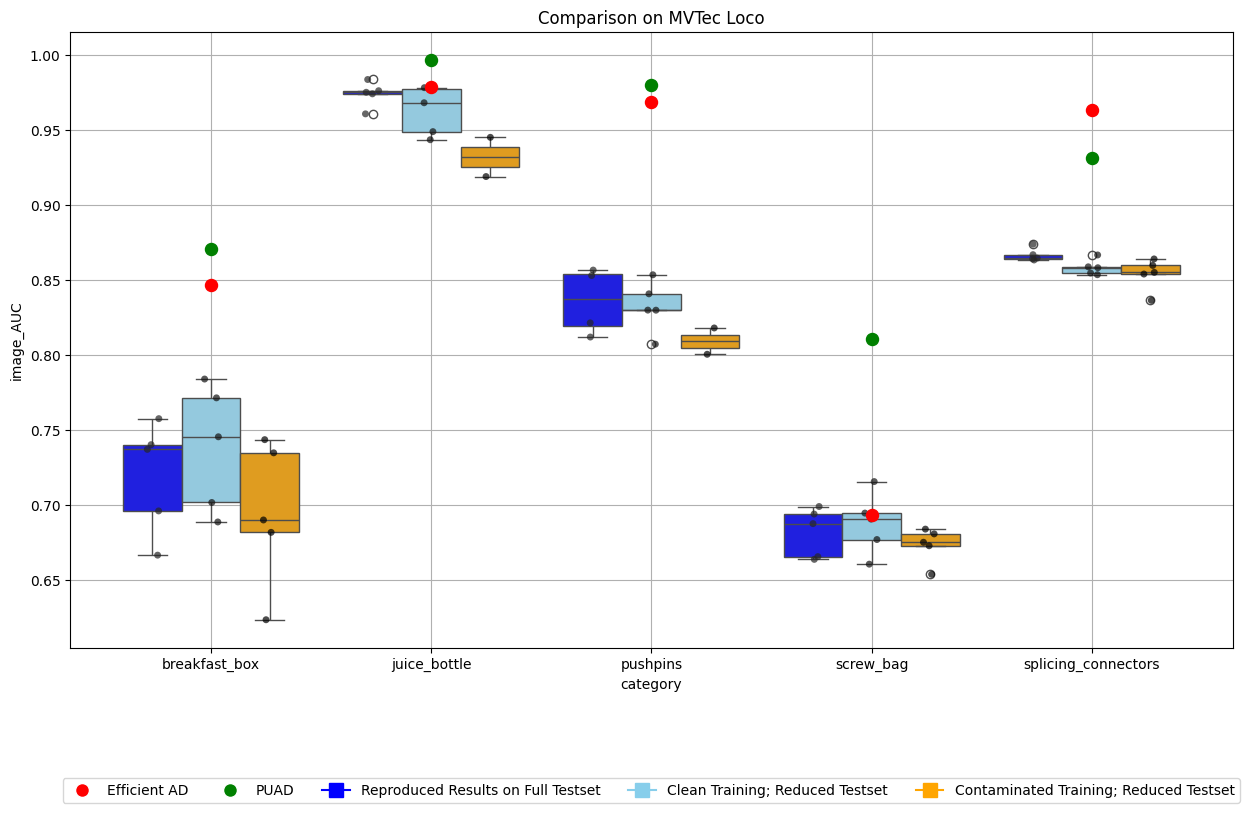

In [4]:

# exp_name= "Exp_20_06_24"
# category= "breakfast_box"
# root= '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/'

# with open('/home/bule/projects/UTRAD/configurations/mvtec_loco.json', 'r') as file:
#     conf_loco = json.load(file)
# print(list(conf_loco['anomaly_categories'].keys()))

# run=1
# logfile_path= os.path.join(root, f'{exp_name}_run_{run}-{category}', 'args.log')

# category_list= list(conf_loco['anomaly_categories'].keys())
# #category_list= ['breakfast_box', 'screw_bag']
# run_range= np.arange(1,6)

# res_df_cont=[]
# for category in category_list:
#     logfile_paths= []
#     for run in run_range:
#         logfile_path= os.path.join(root, f'{exp_name}_run_{run}-{category}', 'args.log')
#         if os.path.exists(logfile_path):
#             logfile_paths.append(logfile_path)
        
#     lastrow_df=last_rows_metric(logfile_paths)
#     lastrow_df['category']= [category]*len(lastrow_df)
#     res_df_cont.append(lastrow_df)
    
# res_df_cont= pd.concat(res_df_cont)


# res_df_cont['contamination']= ['10']*len(res_df_cont)
# res_df_cont['setting']= ['contaminated']*len(res_df_cont)




# res_df_end=pd.concat([res_df, res_df_cont])
# print(res_df_end.head())


################################### load 

plt.figure(figsize=(15, 8))

res_df_end = pd.read_pickle('/home/bule/projects/UTRAD/results/mvtec_loco/allresults/contaminated_vs_clean_box.pkl')
auc_EfficicentAD = {'breakfast_box': [0.8464],'juice_bottle': [0.9789],'pushpins': [0.9684],'screw_bag': [0.6936],'splicing_connectors':[0.9633]}
auc_PUAD = {'breakfast_box': [0.8707],'juice_bottle': [0.9968],'pushpins': [0.9802],'screw_bag': [0.8107],'splicing_connectors':[0.9312]}




exp_name= "Exp_20_06_24"
category= "breakfast_box"
root= '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/'

with open('/home/bule/projects/UTRAD/configurations/mvtec_loco.json', 'r') as file:
    conf_loco = json.load(file)
print(list(conf_loco['anomaly_categories'].keys()))



category_list= list(conf_loco['anomaly_categories'].keys())
#category_list= ['breakfast_box', 'screw_bag']
run_range= np.arange(1,6)

res_df_cont=[]
for category in category_list:
    logfile_paths= []
    for run in run_range:
        logfile_path= os.path.join(root, f'{exp_name}_run_{run}-{category}', 'args_cleaned.log')
        if os.path.exists(logfile_path):
            if len(read_training_scores(logfile_path)['Loss'] )>=150:
                logfile_paths.append(logfile_path)
            
        
    lastrow_df=last_rows_metric(logfile_paths)
    lastrow_df['category']= [category]*len(lastrow_df)
    res_df_cont.append(lastrow_df)
    
res_df_cont= pd.concat(res_df_cont)


res_df_cont['contamination']= ['10']*len(res_df_cont)
res_df_cont['setting']= ['clean_reduced']*len(res_df_cont)


res_df_end=pd.concat([res_df_end, res_df_cont])

hue_order = ['clean', 'clean_reduced', 'contaminated']
palette = {
    'clean': 'blue',
    'clean_reduced': 'skyblue',
    'contaminated': 'orange'
}



ax = sns.boxplot(x="category", y="image_AUC", hue="setting", data=res_df_end,hue_order=hue_order,palette=palette)
sns.stripplot(data=res_df_end, x="category", y="image_AUC", hue="setting", dodge=True, alpha=.7, zorder=3, jitter=0.1, palette='dark:black', legend=False, ax=ax,hue_order=hue_order)


for category, auc in auc_EfficicentAD.items():
    ax.scatter(x=[category], y=auc, color='red', s=75, zorder=5)
for category, auc in auc_PUAD.items():
    ax.scatter(x=[category], y=auc, color='green', s=75, zorder=5)

legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label='Efficient AD', markerfacecolor='red', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='PUAD', markerfacecolor='green', markersize=10),
    plt.Line2D([0], [0], marker='s', color='blue',  label='Reproduced Results on Full Testset', markersize=10),
    plt.Line2D([0], [0], marker='s', color='skyblue', label='Clean Training; Reduced Testset', markersize=10),
    plt.Line2D([0], [0], marker='s', color='orange', label='Contaminated Training; Reduced Testset', markersize=10)
]
ax.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=5)

plt.title('Comparison on MVTec Loco')
plt.grid(True)

In [30]:
def read_all_log_info(root= '/home/bule/projects/UTRAD/results/mvtec/',log='args.log',exp_name= "Exp_07_06",contamination='10',setting='contaminated',run_range= np.arange(1,6),postprocessing='original',CONFIG_PATH='/home/bule/projects/UTRAD/configurations/mvtec.json'):

    if log=='args_cleaned.log' and contamination=='10' and setting=='contaminated':
        raise ValueError('This function is not intended for cleaned logs with contamination 10 , setting should be clean_reduced')

    root=os.path.join(root, f'contamination_{contamination}')
    with open(CONFIG_PATH, 'r') as file:
        conf = json.load(file)

    category_list= list(conf['anomaly_categories'].keys())
    res_df=[]
    for category in category_list:
        logfile_paths= []
        runs=[]
        logfile_path_names=[]
        for run in run_range:
            logfile_path= os.path.join(root, f'{exp_name}_run_{run}-{category}', log)
            if os.path.exists(logfile_path):
                if len(read_training_scores(logfile_path)['Loss'] )==150:
                    logfile_paths.append(logfile_path)  
                    logfile_path_names.extend([logfile_path]*150)
                    runs.extend([run]*150) 
        
        allrows_df=all_results_conc(logfile_paths)
        allrows_df['path']=logfile_path_names        
        allrows_df['run']=runs
        allrows_df['category']= [category]*len(allrows_df)
        allrows_df['postprocessing']= [postprocessing]*len(allrows_df)
        allrows_df['contamination']= [contamination]*len(allrows_df)
        allrows_df['setting']= [setting]*len(allrows_df)
        res_df.append(allrows_df)
    return  pd.concat(res_df)

allrows_df_end_cont=         read_all_log_info(root= '/home/bule/projects/UTRAD/results/mvtec_loco/',log='args.log',exp_name= "Exp_20_06_24",contamination='10',setting='contaminated',run_range= np.arange(1,6),postprocessing='original',CONFIG_PATH='/home/bule/projects/UTRAD/configurations/mvtec_loco.json')
allrows_df_end_clean_reduced=read_all_log_info(root= '/home/bule/projects/UTRAD/results/mvtec_loco/',log='args_cleaned.log',exp_name= "Exp_20_06_24",contamination='10',setting='clean_reduced',run_range= np.arange(1,6),postprocessing='original',CONFIG_PATH='/home/bule/projects/UTRAD/configurations/mvtec_loco.json')
allrows_df_end_clean=        read_all_log_info(root= '/home/bule/projects/UTRAD/results/mvtec_loco/',log='args.log',exp_name= "Exp_25_06_24",contamination='0',setting='clean',run_range= np.arange(1,6),postprocessing='original',CONFIG_PATH='/home/bule/projects/UTRAD/configurations/mvtec_loco.json')

allres=pd.concat([allrows_df_end_cont,allrows_df_end_clean_reduced,allrows_df_end_clean])
allres

,Loss,Loss_scale,image_AUC,pixel_AUC,epoch,path,run,category,postprocessing,contamination,setting
0,0.083441,34.873009,0.475748,0.543025,0,/home/bule/projects/UTRAD/results/mvtec_loco/c...,1,breakfast_box,original,10,contaminated
1,0.063348,21.652822,0.511426,0.314232,1,/home/bule/projects/UTRAD/results/mvtec_loco/c...,1,breakfast_box,original,10,contaminated
2,0.058088,15.409805,0.505160,0.325451,2,/home/bule/projects/UTRAD/results/mvtec_loco/c...,1,breakfast_box,original,10,contaminated
3,0.054160,10.085503,0.472063,0.160414,3,/home/bule/projects/UTRAD/results/mvtec_loco/c...,1,breakfast_box,original,10,contaminated
4,0.049071,5.540676,0.577694,0.140485,4,/home/bule/projects/UTRAD/results/mvtec_loco/c...,1,breakfast_box,original,10,contaminated
...,...,...,...,...,...,...,...,...,...,...,...
295,0.005625,0.012896,0.861192,0.737648,145,/home/bule/projects/UTRAD/results/mvtec_loco/c...,2,splicing_connectors,original,0,clean
296,0.005579,0.012559,0.871032,0.725684,146,/home/bule/projects/UTRAD/results/mvtec_loco/c...,2,splicing_connectors,original,0,clean
297,0.005582,0.012560,0.868986,0.737725,147,/home/bule/projects/UTRAD/results/mvtec_loco/c...,2,splicing_connectors,original,0,clean
298,0.005547,0.012435,0.868812,0.738519,148,/home/bule/projects/UTRAD/results/mvtec_loco/c...,2,splicing_connectors,original,0,clean


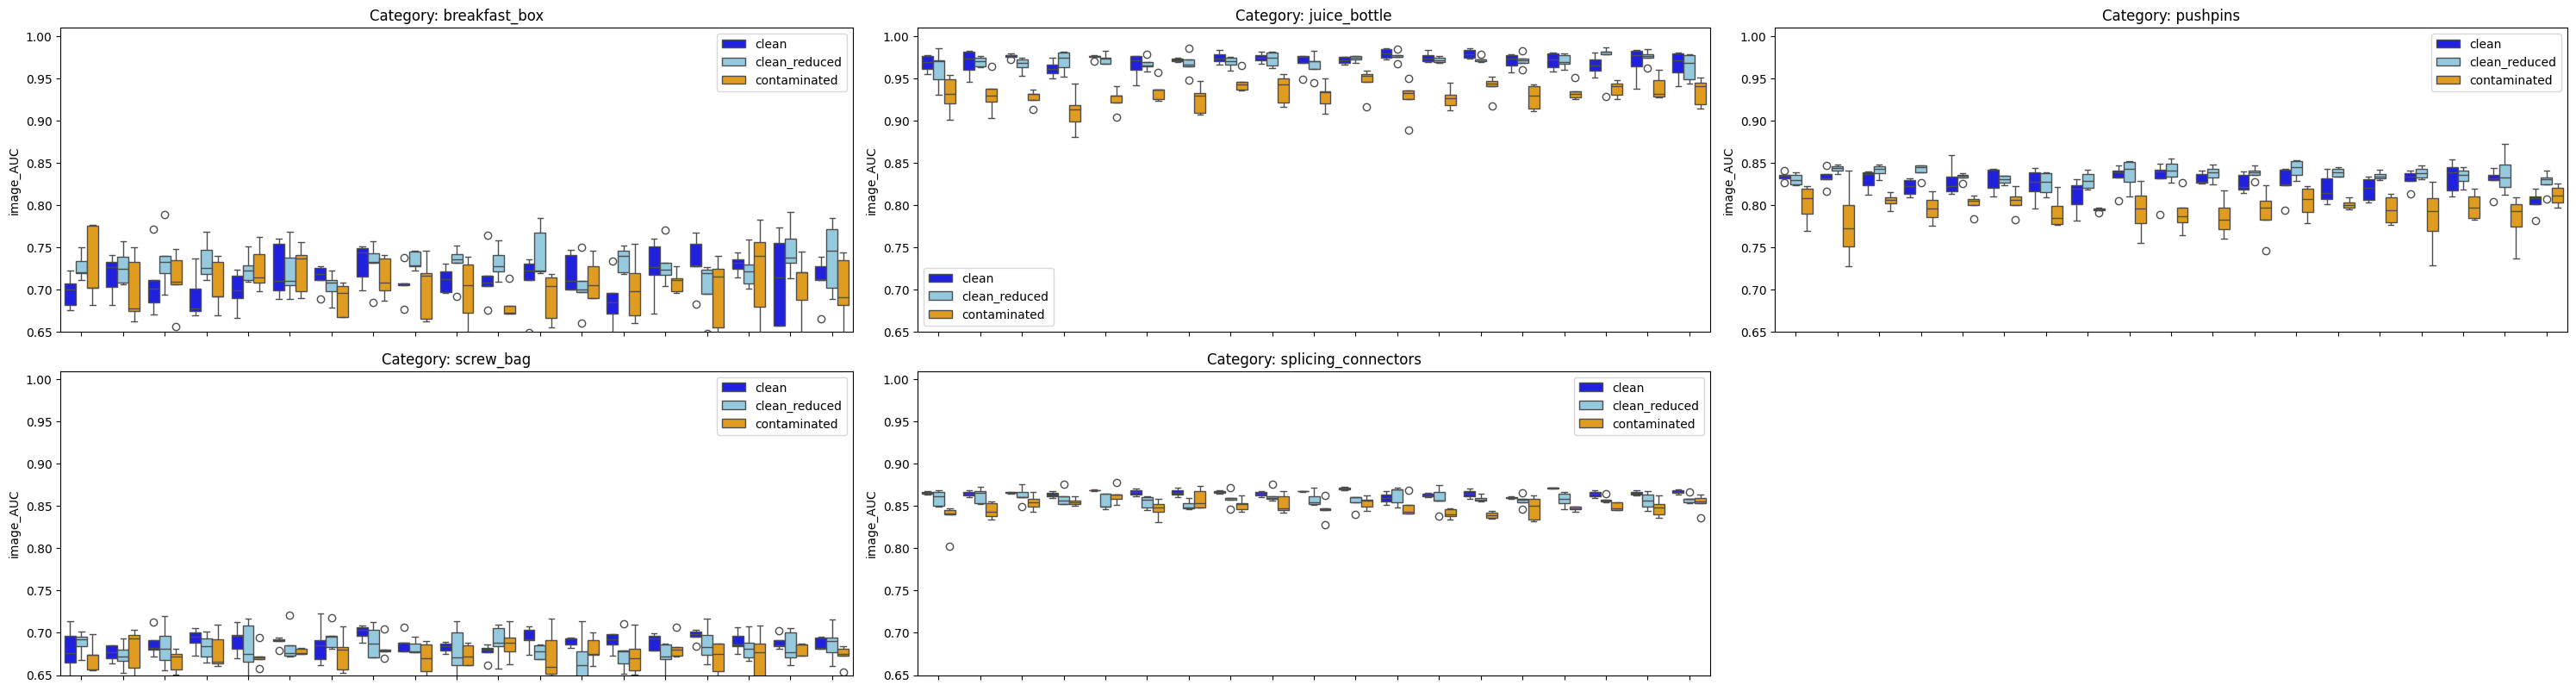

In [31]:
allres_epochs = allres[allres['epoch'] > 130]
categories =allres['category'].unique()
fig, axes = plt.subplots(5, 3, figsize=(30, 20), sharex=True)
axes = axes.flatten()
hue_order = ['clean', 'clean_reduced', 'contaminated']
palette = {
    'clean': 'blue',
    'clean_reduced': 'skyblue',
    'contaminated': 'orange'
}


for ax, category in zip(axes, categories):
    allres_cat = allres_epochs[allres_epochs['category'] == category]
    sns.boxplot(x="epoch", y="image_AUC", hue="setting", data=allres_cat, ax=ax,hue_order=hue_order,palette=palette)
    ax.set_title(f'Category: {category}')
    ax.legend(loc='best')
    ax.set_ylim(0.65,1.01)
for ax in axes[len(categories):]:
    ax.set_visible(False)
plt.tight_layout()
plt.show()


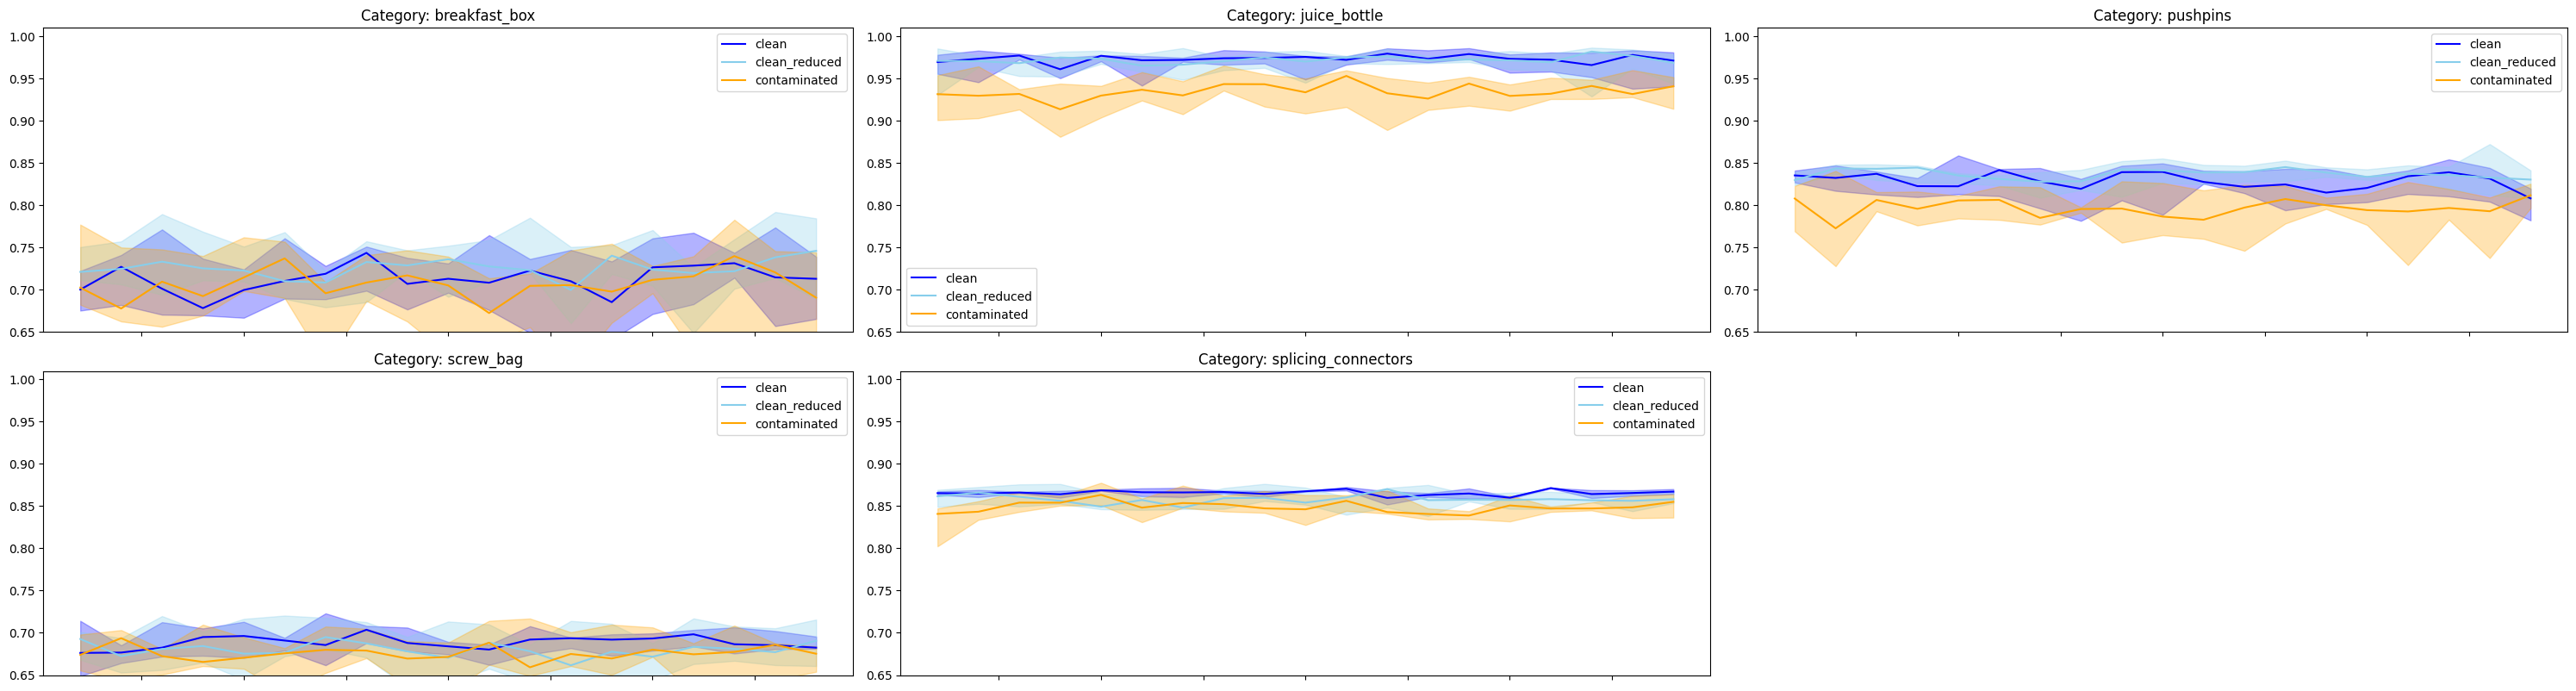

In [40]:

fig, axes = plt.subplots(5, 3, figsize=(30, 20), sharex=True)
axes = axes.flatten()


def calculate_stats(data):
    highest = data.groupby('epoch')['image_AUC'].max()
    lowest = data.groupby('epoch')['image_AUC'].min()
    median = data.groupby('epoch')['image_AUC'].median()
    return highest, lowest, median

for ax, category in zip(axes, categories):
    allres_cat = allres_epochs[allres_epochs['category'] == category]
    for setting in hue_order:
        data = allres_cat[allres_cat['setting'] == setting]
        highest, lowest, median = calculate_stats(data)
        epochs = highest.index
        
        ax.fill_between(epochs, lowest, highest, color=palette[setting], alpha=0.3)
        ax.plot(epochs, median, color=palette[setting], label=setting)

    ax.set_title(f'Category: {category}')
    ax.legend(loc='best')
    ax.set_ylim(0.65, 1.01)

for ax in axes[len(categories):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()


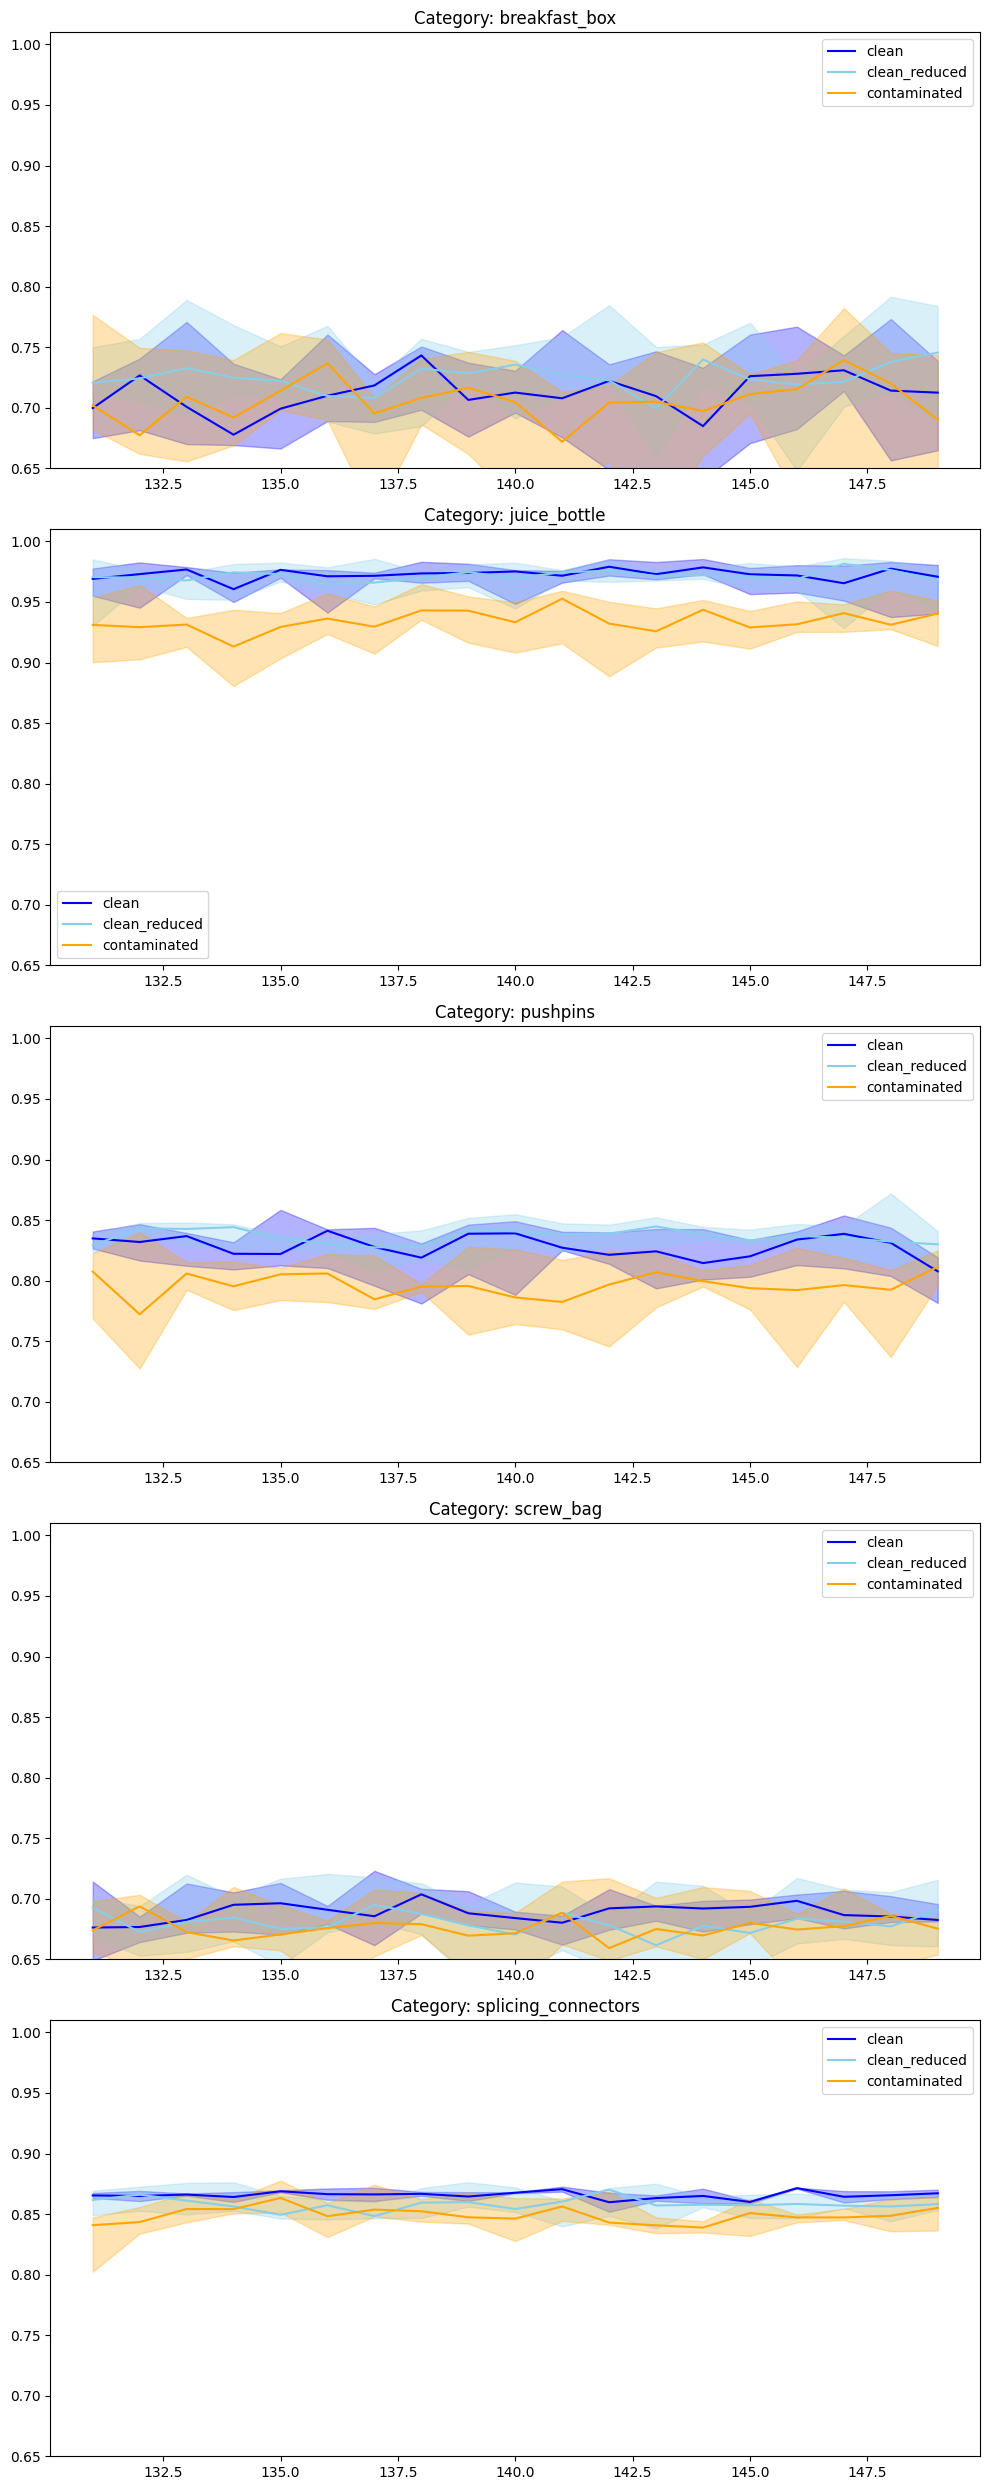

In [35]:
#fig, axes = plt.subplots(5, 3, figsize=(30, 20), sharex=True)
fig, axes = plt.subplots(len(categories), 1, figsize=(10, len(categories) * 5))

# Function to calculate highest, lowest, and median
def calculate_stats(data):
    highest = data.groupby('epoch')['image_AUC'].max()
    lowest = data.groupby('epoch')['image_AUC'].min()
    median = data.groupby('epoch')['image_AUC'].median()
    return highest, lowest, median

for ax, category in zip(axes, categories):
    allres_cat = allres_epochs[allres_epochs['category'] == category]
    for setting in hue_order:
        data = allres_cat[allres_cat['setting'] == setting]
        highest, lowest, median = calculate_stats(data)
        epochs = highest.index
        
        ax.fill_between(epochs, lowest, highest, color=palette[setting], alpha=0.3)
        ax.plot(epochs, median, color=palette[setting], label=setting)

    ax.set_title(f'Category: {category}')
    ax.legend(loc='best')
    ax.set_ylim(0.65, 1.01)

for ax in axes[len(categories):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

ValueError: 'clean' is not a valid color value.

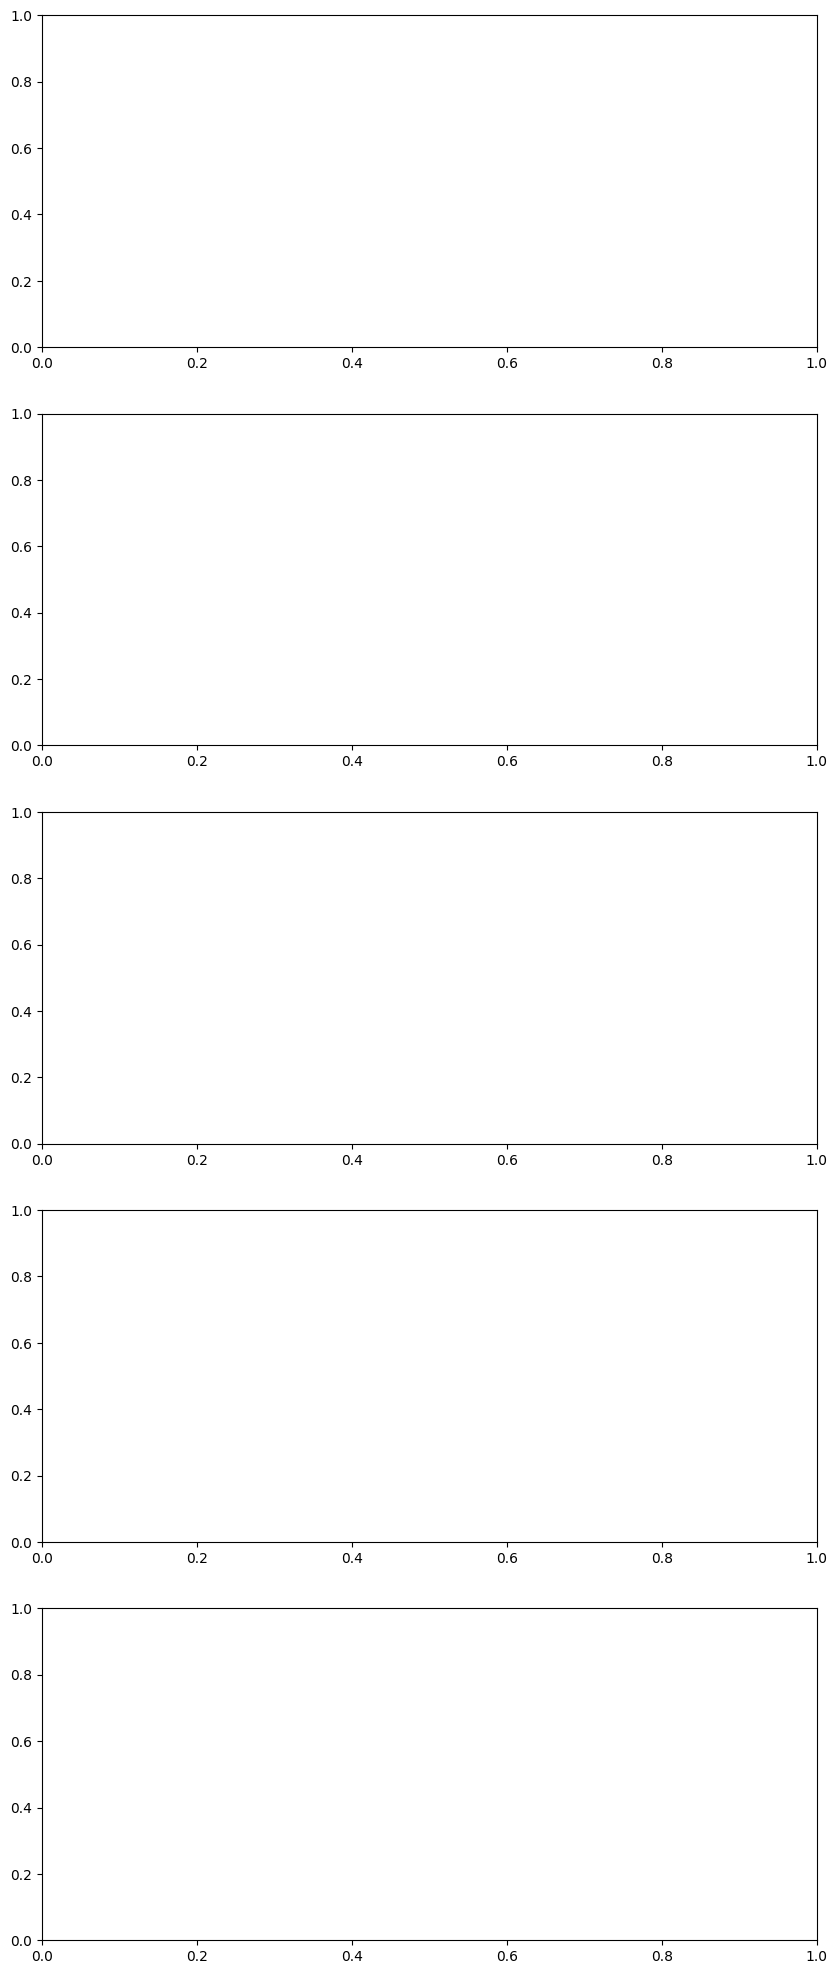

In [29]:
fig, axes = plt.subplots(len(categories), 1, figsize=(10, len(categories) * 5))

# Function to calculate highest, lowest, and median
def calculate_stats(data):
    highest = data.groupby('epoch')['image_AUC'].max()
    lowest = data.groupby('epoch')['image_AUC'].min()
    median = data.groupby('epoch')['image_AUC'].median()
    return highest, lowest, median

for ax, category in zip(axes, categories):
    allres_cat = allres_epochs[allres_epochs['category'] == category]
    for setting, color in zip(hue_order, palette):
        data = allres_cat[allres_cat['setting'] == setting]
        highest, lowest, median = calculate_stats(data)
        epochs = highest.index
        
        ax.fill_between(epochs, lowest, highest, color=color, alpha=0.3)
        ax.plot(epochs, median, color=color, label=setting)

    ax.set_title(f'Category: {category}')
    ax.legend(loc='best')
    ax.set_ylim(0.65, 1.01)

for ax in axes[len(categories):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

# CHECK redundant exps

In [5]:
directories = [
'/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_1-breakfast_box','/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_1-juice_bottle','/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_1-pushpins','/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_1-screw_bag','/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_1-splicing_connectors','/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_2-breakfast_box','/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_2-juice_bottle','/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_2-pushpins','/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_2-screw_bag','/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_2-splicing_connectors','/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_3-breakfast_box','/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_3-juice_bottle','/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_3-pushpins','/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_3-screw_bag','/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_3-splicing_connectors','/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_4-breakfast_box','/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_4-juice_bottle','/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_4-pushpins','/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_4-screw_bag','/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_4-splicing_connectors','/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_5-breakfast_box','/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_5-juice_bottle','/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_5-pushpins','/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_5-screw_bag','/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_5-splicing_connectors']


rerun=[]
path_exist=[]
for path in [path+'/args_cleaned.log' for path in directories]:
    if os.path.exists(path):
        path_exist.append(path)
        if len(read_training_scores(path)['Loss'] )==150:
            rerun.append(path)
        
        
rerun



['/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_1-breakfast_box/args_cleaned.log',
 '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_1-juice_bottle/args_cleaned.log',
 '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_1-pushpins/args_cleaned.log',
 '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_1-screw_bag/args_cleaned.log',
 '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_1-splicing_connectors/args_cleaned.log',
 '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_2-breakfast_box/args_cleaned.log',
 '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_2-juice_bottle/args_cleaned.log',
 '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_2-pushpins/args_cleaned.log',
 '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_2

In [6]:
['/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_1-breakfast_box/args_cleaned.log',
 '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_1-juice_bottle/args_cleaned.log',
 '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_1-screw_bag/args_cleaned.log',
 '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_2-breakfast_box/args_cleaned.log',
 '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_2-juice_bottle/args_cleaned.log',
 '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_2-screw_bag/args_cleaned.log',
 '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_3-breakfast_box/args_cleaned.log',
 '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_3-juice_bottle/args_cleaned.log',
 '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_4-breakfast_box/args_cleaned.log',
 '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_4-juice_bottle/args_cleaned.log',
 '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_4-pushpins/args_cleaned.log',
 '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_5-breakfast_box/args_cleaned.log',
 '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_5-juice_bottle/args_cleaned.log',
 '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_5-pushpins/args_cleaned.log']

['/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_1-breakfast_box/args_cleaned.log',
 '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_1-juice_bottle/args_cleaned.log',
 '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_1-screw_bag/args_cleaned.log',
 '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_2-breakfast_box/args_cleaned.log',
 '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_2-juice_bottle/args_cleaned.log',
 '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_2-screw_bag/args_cleaned.log',
 '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_3-breakfast_box/args_cleaned.log',
 '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_3-juice_bottle/args_cleaned.log',
 '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_4-

In [7]:
len(directories)

25

In [8]:
notlonglist=[]
for path in directories:
    if os.path.exists(path+'/Additional_Gausskernel.log'):
        notlonglist.append(path)
notlonglist

[]

In [9]:
import shutil
import os

# List of directories to remove
remove_dirs = []


# Function to remove directories
def remove_directories(dirs):
    for dir_path in dirs:
        if os.path.exists(dir_path):
            shutil.rmtree(dir_path)
            print(f"Removed directory and its contents: {dir_path}")
        else:
            print(f"Directory does not exist: {dir_path}")

# Remove the directories
remove_directories(remove_dirs)